# Задача
В этой работе вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age - возраст, количественный признак
 - workclass - тип работодателя, количественный признак
 - fnlwgt - итоговый вес объекта, количественный признак
 - education - уровень образования, качественный признак
 - education-num - количество лет обучения, количественный признак
 - marital-status - семейное положение, категориальный признак
 - occupation - профессия, категориальный признак
 - relationship - тип семеныйх отношений, категориальный признак
 - race - раса, категориальный признак
 - sex - пол, количественный признак
 - capital-gain - прирост капитала, количественный признак
 - capital-loss - потери капитала, количественный признак
 - hours-per-week - количество часов работы в неделю, количественный признак
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

В этой задаче для обучения будут использовать 2 алгоритма:
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

# Решение

Загрузите набор данных *data.adult.csv* с помощью `pandas` (скачать можно [здесь](https://drive.google.com/file/d/1Lo47fXx1RrJG3v9E-Gck1T45n5bJ_SJf/view?usp=sharing), или с помощью скрипта ниже). Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [ ]:
!gdown 1Lo47fXx1RrJG3v9E-Gck1T45n5bJ_SJf

Downloading...
From: https://drive.google.com/uc?id=1Lo47fXx1RrJG3v9E-Gck1T45n5bJ_SJf
To: /content/data.adult.csv
100% 1.54M/1.54M [00:00<00:00, 33.0MB/s]


In [ ]:
#importing libraries and fixing seeds for reproductability of predictions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler




random.seed(42)
np.random.seed(42)

In [ ]:
adult_data = pd.read_csv('data.adult.csv')

print(f'dataframe size:{adult_data.shape}')
adult_data.head(10)

dataframe size:(16280, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,<=50K
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,<=50K
7,18,?,423460,11th,7,Never-married,?,Own-child,White,Male,0,0,36,<=50K
8,25,Private,110138,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,<=50K
9,53,Federal-gov,167410,Bachelors,13,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,<=50K


In [ ]:
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
>50K,<=50K        object
dtype: object

## Анализ и предобработка данных

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
1. Проверьте есть ли в данных пропущенные значения (здесь они обозначены как "?"). Удалите из выборки все объекты с пропусками.
2. Выделите 60% выборки для обучения и дальнейшего анализа.
3. Обратите внимание, что не все признаки являются вещественными (числовыми). Сначала их необходимо проанализировать и по необходимости предобработать. Все шаги предобработки поясните текстом.
4. Целевую переменную (ту, которую мы хотим предсказывать) можно выделить в отдельную переменную и преобразуйте к бинарному формату (НЕ забудьте удалить ее из датасета, когда будете обучать модель).


In [ ]:
adult_data = adult_data.replace('?', np.NaN)
adult_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,<=50K
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,<=50K
7,18,NaN,423460,11th,7,Never-married,NaN,Own-child,White,Male,0,0,36,<=50K
8,25,Private,110138,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,<=50K
9,53,Federal-gov,167410,Bachelors,13,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,<=50K


In [ ]:
adult_data.isna().sum()


age                 0
workclass         929
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        933
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64

In [ ]:
adult_data.dropna(inplace=True)

print(f'dataframe shape after NaN removing:{adult_data.shape}')


adult_data.drop_duplicates(inplace=True)
print(f'dataframe shape after duplicate removing:{adult_data.shape}')

dataframe shape after NaN removing:(15347, 14)
dataframe shape after duplicate removing:(15335, 14)


In [ ]:
adult_data.rename(columns={'>50K,<=50K':'target'}, inplace=True)
adult_data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [ ]:
#кодирование целевой переменной
adult_data['target'] = adult_data['target'].replace('<=50K', '0')
adult_data['target'] = adult_data['target'].replace('>50K', '1')
adult_data.head(10)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,0
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,0
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,0
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,0
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,1
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,0
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,0
8,25,Private,110138,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,0
9,53,Federal-gov,167410,Bachelors,13,Divorced,Tech-support,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,0
10,19,Private,131615,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>, <Axes: >, <Axes: >]],
      dtype=object)

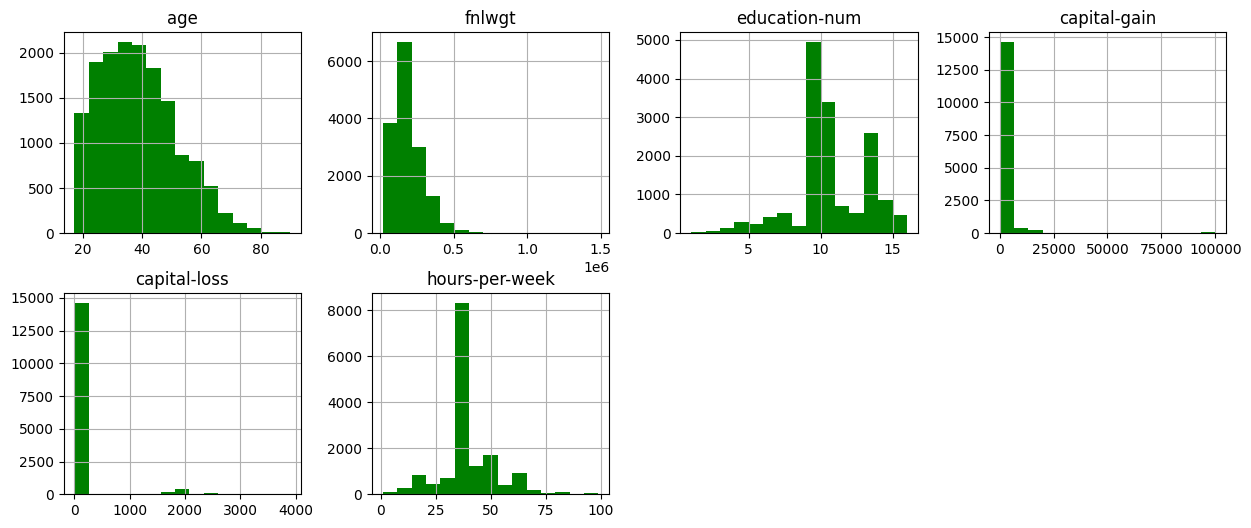

In [ ]:
#распределение количественных переменных
cat_features_mask = (adult_data.dtypes == "object").values 
X_real = adult_data[adult_data.columns[~cat_features_mask]]

X_real.hist(bins=15, figsize=(15, 6), layout=(2, 4), color='green')


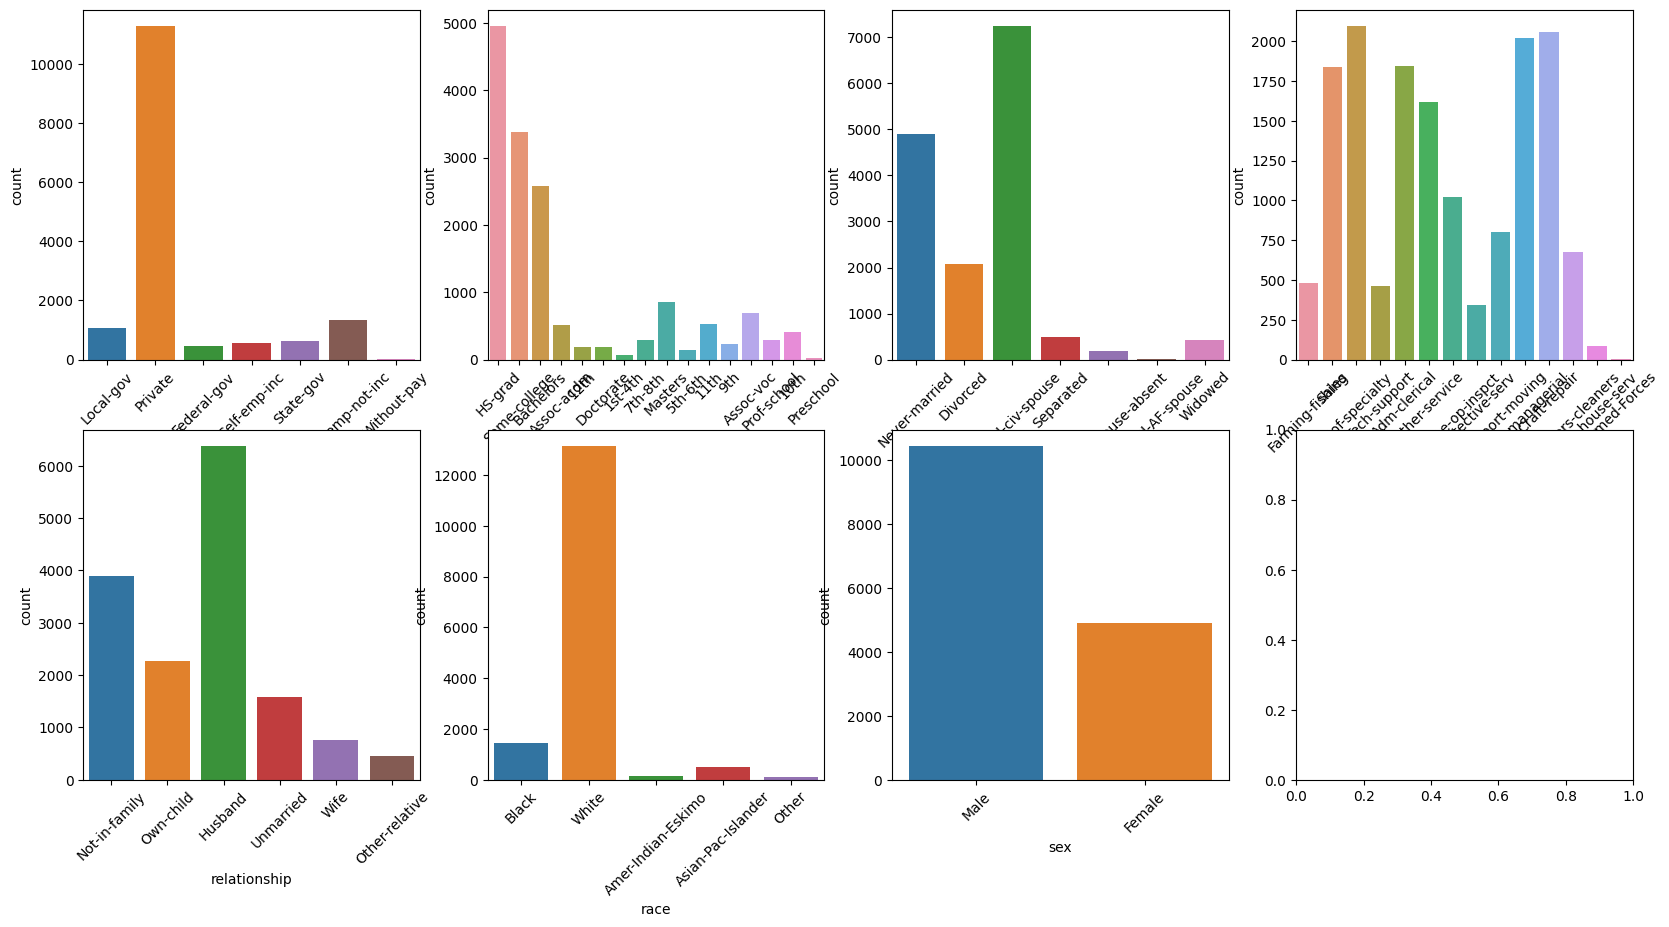

In [ ]:
cat_columns = list(adult_data.columns[cat_features_mask])[:-1]
#распределение категориальных переменных

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for variable, subplot in zip(cat_columns, ax.flatten()):
    sns.countplot(data = adult_data, x = variable , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)



<Axes: xlabel='target', ylabel='count'>

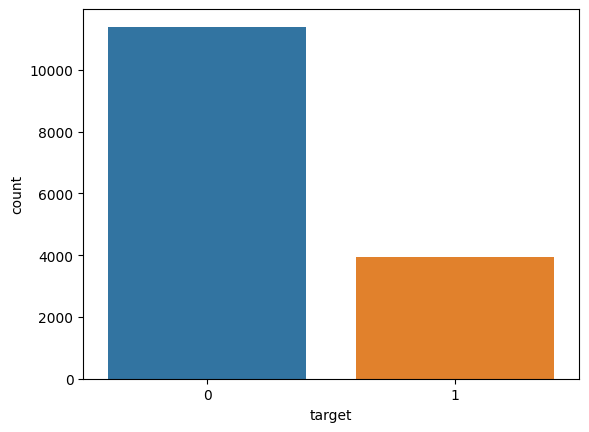

In [ ]:
#распределение целевой переменной
sns.countplot(data=adult_data, x = adult_data['target'])


<ipython-input-15-cec3a94249f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(adult_data.corr(), annot=True)


<Axes: >

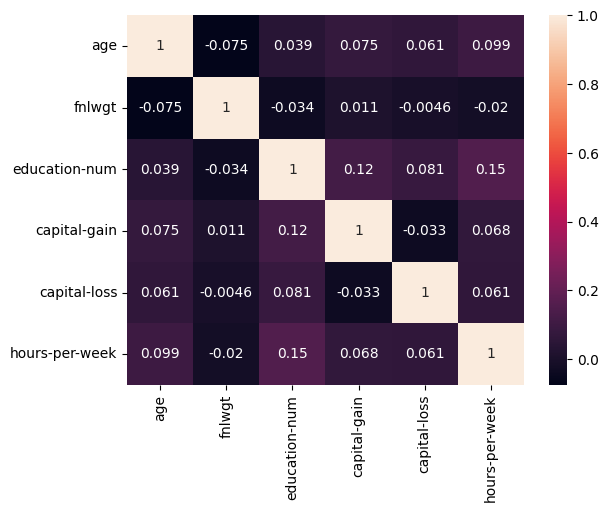

In [ ]:
#матрица корелляций
sns.heatmap(adult_data.corr(), annot=True)


In [ ]:
#отделяем значение целевой переменной признаков
y = adult_data['target']
X = adult_data.drop('target', axis=1)

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. Давайте посмотрим на значения самих признаков.

Что можете сказать о разбросе данных и сбалансированности выборки? В каком диапазоне лежат исследуемые признаки?

## Промежуточный анализ данных:



*   Не наблюдается больших аномалий в распределении количественной переменных. Распределения в основном полимодальны и отличаются от нормальноых. У переменных capital-gain(прирост капитала) и capital-loss(потеря капитала) наблюдаются небольшие выбросы. Если качество обучения будет низким, то можно внимательнее ислледовать эти значения и при необходиомсти удалить;
*   По распределению категорильных переменных можно утверждать, что наблюдается дисбаланс классов по переменным "тип работодателя", "раса"и "пол". 

*   В распределении целевой переменной также наблюдается явный дисбаланс в пользу преобладания среднего заработка, не превышающего $50K.
*   При анализе взаимосвязи числовых признаков не выявлено сильных корелляций между переменными, следовательно нет необходимости удалять колонки из датафрейма;





## Добавление категориальных признаков

Добавим к предобработанным вещественным признакам категориальные. Но для начала их тоже необходимо предобработать.

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

После преобразования категориальных признаков, добавьте их к вещественным предобработанным данным для обучения.

>PS Напоминаю, что важно удалить колонку с целевым значением

In [ ]:
X_dum = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.40, random_state = 42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

print(f'X_train size:{X_train.shape}')
print(f'y_train size{y_train.shape}')
print('\n')
print(f'X_test size:{X_test.shape}')
print(f'y_test size:{y_test.shape}')


X_train size:(9201, 56)
y_train size(9201,)


X_test size:(6134, 56)
y_test size:(6134,)


## Обучение классификаторов

В начале посмотрим, как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 2 алгоритма:
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала обучим  выберем один гиперпараметр, который будем оптимизировать, — глубина дерева (*max_depth*).
 
Остальные параметры оставляйте в значениях по умолчанию.

Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

Что вы можете сказать о получившихся графиках? Какой алгоритм справился лучше? Какой быстрее? Почему?

## **Decision Tree**

In [ ]:
#импорт нужных библиотек
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
#попробуем обучить модель без подбора гиперпараметров

raw_model_dt = DecisionTreeClassifier().fit(X_train_std, y_train)

raw_results_dt = raw_model_dt.score(X_test_std, y_test)

print(raw_results_dt)


0.806488425171177


In [ ]:
#обучим модель, подобрав гиперпараметр 'глубина дерева' 

params_grid = {'max_depth':[i for i in range(2, 20)]}

gs = GridSearchCV(DecisionTreeClassifier(), params_grid, cv=5)

gs.fit(X_train, y_train)

print(f"Точность обучения на тренировочной выборке при подброре гиперпараметра составила:\
      {round(gs.best_score_, 3)}")
print(f'Значения гиперпараметра{gs.best_params_}')
print('\n')

y_pred_dt = gs.best_estimator_.predict(X_test)
f1_dec = f1_score(y_test, y_pred_dt, average='micro')
# cv_scores_dt = cross_val_score(gs, X_test, y_test, cv=5)
# fit_time = cross_validate(gs, X_)

print(f'Test accuracy score:{round(accuracy_score(y_test, y_pred_dt),3)}')
print(f'Test F1-score:{round(f1_dec,3)}')

print("\n")
print('Classification report:')
print(classification_report(y_test, y_pred_dt))


Точность обучения на тренировочной выборке при подброре гиперпараметра составила:      0.836
Значения гиперпараметра{'max_depth': 8}


Test accuracy score:0.852
Test F1-score:0.852


Classification report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4630
           1       0.78      0.55      0.64      1504

    accuracy                           0.85      6134
   macro avg       0.83      0.75      0.78      6134
weighted avg       0.85      0.85      0.84      6134



После нахождения оптимальной глубины дерева запустим механизм перекрёстной проверки для вычисления заданной метрики для каждого фолда(в данном случае фолдов будет всего 5). Получим также величины стандартных отклоенений для построения доверительных интервалов и среднее время обучения алгоритма: 

In [ ]:
cv_scores_dt = cross_val_score(DecisionTreeClassifier(max_depth=6), X_train, y_train, cv=20)
scores_dt = cross_validate(DecisionTreeClassifier(max_depth=6), X_train, y_train)

print(f'Scores on each fold:{ np.round(cv_scores_dt, decimals = 3)}')
print(f'Standard deviation:{round(cv_scores_dt.std(),3)}')
print('Mean fit time for each fold:', round(scores_dt['fit_time'].mean(), 2))


Scores on each fold:[0.831 0.841 0.82  0.8   0.843 0.83  0.833 0.854 0.833 0.841 0.846 0.824
 0.839 0.826 0.833 0.833 0.854 0.839 0.83  0.839]
Standard deviation:0.012
Mean fit time for each fold: 0.03


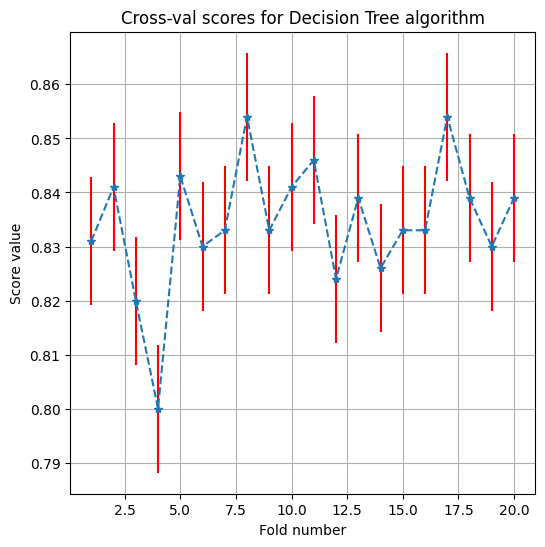

In [ ]:
fold_number = np.arange(1,21,1)

plt.figure(figsize=(6,6))
plt.errorbar(fold_number, np.round(cv_scores_dt, decimals = 3), yerr = cv_scores_rf.std(), fmt='--*', ecolor='red')
plt.title('Cross-val scores for Decision Tree algorithm')
plt.xlabel('Fold number')
plt.ylabel('Score value')
plt.grid()
plt.show()


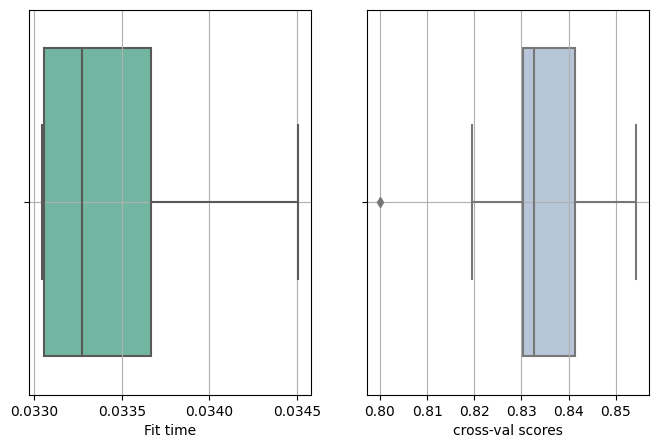

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))



sns.boxplot(x=scores_dt['fit_time'], ax = ax[0], palette='Set2')
ax[0].set_xlabel('Fit time')
ax[0].grid()

sns.boxplot(x=cv_scores_dt, ax=ax[1], color='lightsteelblue')
ax[1].set_xlabel('cross-val scores')
ax[1].grid()
plt.show()

Далее произведем подбор других гиперпараметров алгоритмов. Начнет со случайного леса. Для начала подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящих из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте подобранное количество деревьев.

## **Random Forest**

Изначально ожидаем от случайного леса больший точности, поскольку случайный лес - это по сути ансамбль из деревьев, каждое из которых обучается на собственной бутсрапированной выборке со случайной выбранными признаками. Склонность к переобучению деревьев здесь можно использовать как преимущество благодаря тому, что их ошибки не будут скореллированы, а резлуьтат предсказания будет усреднён. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#попробуем обучить модель без подбора гиперпараметров

raw_model_rf = RandomForestClassifier().fit(X_train_std, y_train)

raw_results_rf = raw_model_rf.score(X_test_std, y_test)

print(raw_results_rf)


0.8480599934789697


In [ ]:

#попробуем подобрать оптимальное число деревьев для алгоритма случайный лес
grid_par_rf = {'n_estimators': [i for i in range(1,110)]}

rf_opt = GridSearchCV(RandomForestClassifier(), grid_par_rf, cv=5, scoring='accuracy')
rf_opt.fit(X_train_std, y_train)

rf_opt.best_params_, rf_opt.best_score_


({'n_estimators': 92}, 0.8414311102189262)

In [ ]:
y_pred_rf_opt = rf_opt.best_estimator_.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf_opt, average='micro')
acc_rf = accuracy_score(y_test, y_pred_rf_opt)

print(f'Test accuracy score:{round(acc_rf,3)}')
print(f'Test F1-score:{round(f1_rf,3)}')


Test accuracy score:0.848
Test F1-score:0.848


Теперь подберите следующие оптимальные параметры:
- максимальная глубина решающего дерева (*max_depth*)
- функция оценки качества разбиения (*criterion*)
- максимальное количесво учитываемых признаков при разбиении (*max_features*)

Остальные параметры оставляйте по умолчанию, за исключением парамтра `n_estimators` для случайного леса, выбранного на предыдущем шаге.

Оцените скорость обучения каждого из алгоритмов. Для этого воспользуйтесь графиком вида "ящик с усами", который отражает среднее время обучения алгоритма при фиксированном значении гиперпараметров. Что вы можете сказать о скорости работы алгоритмов? Почему наблюдаются такие результаты? Можно ли ускорить? Если да, то каким образом?

In [ ]:
all_grid_par_rf = {'max_depth': [i for i in range(1,8)],
               'criterion': ['gini','entropy','log_loss'],
               'max_features': ['sqrt','log2', 10, 15]
               }

rf_tuned = GridSearchCV(RandomForestClassifier(n_estimators = 92), all_grid_par_rf, cv=5, scoring='accuracy')
rf_tuned.fit(X_train, y_train)

rf_tuned.best_params_, rf_tuned.best_score_


({'criterion': 'gini', 'max_depth': 7, 'max_features': 15}, 0.8427355170866495)

In [ ]:
y_pred_rf_tuned = rf_tuned.best_estimator_.predict(X_test)

f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='micro')

acc_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)

print(f'Accuracy score:{round(acc_rf_tuned,3)}')
print(f'F1-score:{round(f1_rf_tuned,3)}')


Accuracy score:0.858
F1-score:0.858


In [ ]:
cv_scores_rf = cross_val_score(RandomForestClassifier(n_estimators = 92,criterion = 'gini', max_depth = 7, max_features = 15), X_train, y_train, cv = 20)

scores_rf = cross_validate(RandomForestClassifier(max_depth=6), X_train, y_train)

print(f'Scores on each fold:{ np.round(cv_scores_rf, decimals = 3)}')
print(f'Standard deviation:{round(cv_scores_rf.std(),3)}')
print('Mean fit time for each fold:', round(scores_rf['fit_time'].mean(), 2))


Scores on each fold:[0.855 0.839 0.817 0.809 0.848 0.848 0.85  0.854 0.848 0.848 0.846 0.83
 0.841 0.835 0.837 0.848 0.846 0.857 0.848 0.85 ]
Standard deviation:0.012
Mean fit time for each fold: 0.63


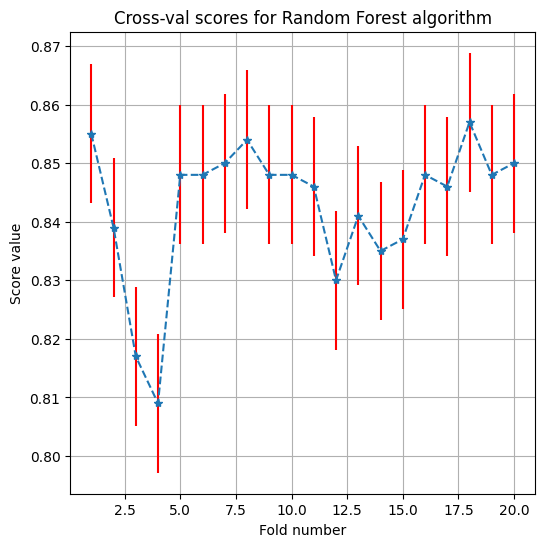

In [ ]:
fold_number = np.arange(1,21,1)

plt.figure(figsize=(6,6))
plt.errorbar(fold_number, np.round(cv_scores_rf, decimals = 3), yerr = cv_scores_rf.std(), fmt='--*', ecolor='red')
plt.title('Cross-val scores for Random Forest algorithm')
plt.xlabel('Fold number')
plt.ylabel('Score value')
plt.grid()
plt.show()


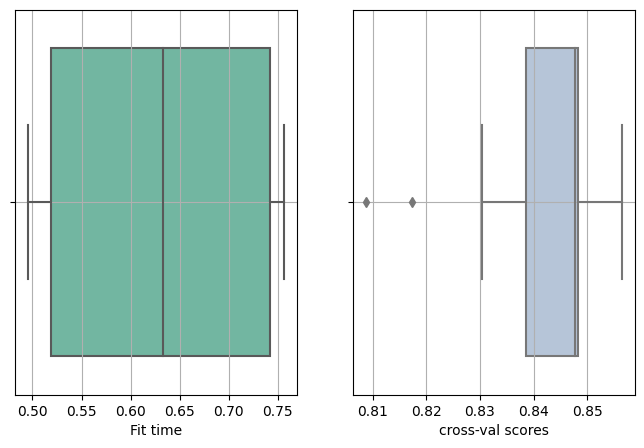

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))



sns.boxplot(x=scores_rf['fit_time'], ax = ax[0], palette='Set2')
ax[0].set_xlabel('Fit time')
ax[0].grid()

sns.boxplot(x=cv_scores_rf, ax=ax[1], color='lightsteelblue')
ax[1].set_xlabel('cross-val scores')
ax[1].grid()
plt.show()

## Сравнение результатов

Сравните результаты алгоритмво. Для этого воспользуйтесь "ящиком с усами" (boxplot).

Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [ ]:
score_list = list(np.concatenate([cv_scores_dt, cv_scores_rf]))
alg_list = ['Decision Tree'] * 20 + ['Random forest'] * 20
cross_val_df = pd.DataFrame({
    'cross_val_scores': score_list,
    'algorithm_type': alg_list
})

cross_val_df.head()

,cross_val_scores,algorithm_type
0,0.830803,Decision Tree
1,0.841304,Decision Tree
2,0.819565,Decision Tree
3,0.800000,Decision Tree
4,0.843478,Decision Tree


<Axes: xlabel='cross_val_scores', ylabel='algorithm_type'>

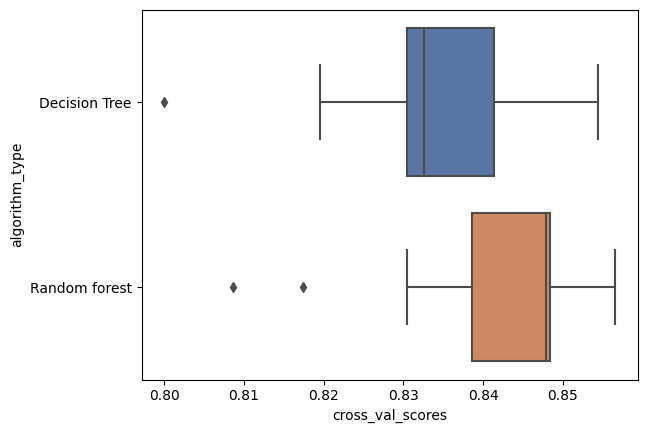

In [ ]:
sns.boxplot(data=cross_val_df, x='cross_val_scores', y ='algorithm_type', palette='deep')


In [ ]:
#посмотрим на средние значения cross-val score:

print('Mean cross-val score for tree:', np.round(np.mean(cv_scores_dt), decimals=3 ) )
print('Mean cross-val score for forest:', np.round(np.mean(cv_scores_rf), decimals=3 ))


Mean cross-val score for tree: 0.834
Mean cross-val score for forest: 0.843


Проведём **t-test Стьюдента** для проверки того, равны ли средние значения cross-val scores в генеральной совокупности.

**нулевая гипотеза:**  mu1=mu2 (средние значения cross_val_score равны)

**альтернативная гипотеза:**  mu1 != mu2(средние значения cross_val_score не равны)


Вначале проверим равенство дсиперсий у двух выборок:


In [ ]:
print(np.var(cv_scores_dt), np.var(cv_scores_rf))


0.00014034762901758447 0.0001404512518251392


Можем считать дисперсии выборок равными. Проведём t-test:

In [ ]:
import scipy.stats as stats

stats.ttest_ind(a=cv_scores_dt, b=cv_scores_rf, equal_var=True)


Ttest_indResult(statistic=-2.1198950361801954, pvalue=0.04060365000466203)

Получили значение p-value=0.04, следовательно при 95% уровне значимости мы  можем отвергнуть нулевую гипотезу теста, так как p-value < 0.05. Следовательно можем считать, что средние значения cross-val-score статистически значимо отличаются в двух выборок в генеральной совокупности

## Тестирование всех модели

Протестируйте последние построенные модели (наилучшее решающее дерево и наилучший случайный лес) на данных, которые были отложены для теста (их должно было остаться 40%). Не забудьте про все необходимые преобразования.

In [ ]:

final_tree_model = DecisionTreeClassifier(max_depth = 6 ).fit(X_train_std, y_train)

final_results_dt = final_tree_model.score(X_test_std, y_test)

print(f'DT final model score:{round(final_results_dt,3)}')

DT final model score:0.854


In [ ]:
final_forest_model = RandomForestClassifier(n_estimators = 92, criterion = 'gini',max_depth = 7, max_features= 15).fit(X_train_std, y_train)

final_results_rf = final_forest_model.score(X_test_std, y_test)

print(f'RF final model score:{round(final_results_rf,3)}')

RF final model score:0.859


# **Вывод:**


*   Алгоритм решающее дерево(**DT**) работает гораздо быстрее, чем случайный лес(**RF**);

*   Алгоритм (**DT**) даёт меньшую точность, чем случайный лес(**RF**) на тестовых данных, а также тренировочных данных при кросс-валидации;

*   Модель DT дала точность 80% при подборе гиперпараметра. Это говорит о том, что данные сами по себе хорошие и были правильно предобработаны;

*   Подбор гиперпараметра увеличил точность алгоритма  DT на тестовом наборе данных на 5% - хороший результат;
*   Подбор ВСЕХ гиперпараметров увеличил точность алгоритма RF на тестовом наборе данных на 1-2% - неплохой результат;


*   С помощью t-критерия Стьюдента было установлено, что средние значения точности по кросс-валидации у данных моделей статистически значимо отличаются.У модели RF это значение больше. Количество фолдов для кросс-валидационной оценки было увеличено до 20 для большей репрезентативности выборки;

*   В целом мы спокойно можем использовать  Decision Tree, так как он дал почти такую же точность как Random Forest. При этом понадобилось настроить только один гиперпараметр. RandomForest практически сразу дал очень хороший результат, но подбор гиперпараметров занимает много времени. Поэтому если точность в 1% для нас не так важна, то предпочтительнее будет алгоритм DecisionTree



